Q1 : Implement logistic regression using Python (both scratch and sk learn) to perform classification on Social_Network_Ads.csv dataset 

Try all three  and compare the results
using raw data
 normalisation 
 Standardisation  

Split the dataset into train and test set. (in ratio 70:30)

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


data = pd.read_csv('Social_Network_Ads.csv')

#Transform the 'Gender' column in the 'data' DataFrame by mapping the values 'Male' to 1 and 'Female' to 0.
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})

# Separating features and target variable
x = data.iloc[:, :4].values
y = data.iloc[:, 4].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, x, y):
        n_samples, n_features = x.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_model = np.dot(x, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(x.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, x):
        linear_model = np.dot(x, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = np.where(y_predicted > 0.5, 1, 0)
        return y_predicted_cls

def evaluate_model(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    return accuracy

def normalize_data(x):
    return (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))

def standardize_data(x):
    return (x - x.mean(axis=0)) / x.std(axis=0)


# Initialize logistic regression model
log_reg = LogisticRegression()
print()

# Training and testing using raw data
log_reg.fit(x_train, y_train)
y_pred_raw = log_reg.predict(x_test)
accuracy_raw = evaluate_model(y_test, y_pred_raw)
print("Accuracy using raw data:", accuracy_raw)

# Normalize data
x_train_normalized = normalize_data(x_train)
x_test_normalized = normalize_data(x_test)

# Training and testing using normalized data
log_reg.fit(x_train_normalized, y_train)
y_pred_normalized = log_reg.predict(x_test_normalized)
accuracy_normalized = evaluate_model(y_test, y_pred_normalized)
print("Accuracy using normalized data:", accuracy_normalized)

# Standardize data
x_train_standardized = standardize_data(x_train)
x_test_standardized = standardize_data(x_test)

# Training and testing using standardized data
log_reg.fit(x_train_standardized, y_train)
y_pred_standardized = log_reg.predict(x_test_standardized)
accuracy_standardized = evaluate_model(y_test, y_pred_standardized)
print("Accuracy using standardized data:", accuracy_standardized)

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Training and testing using raw data
log_reg.fit(x_train, y_train)
y_pred_raw = log_reg.predict(x_test)
accuracy_raw = accuracy_score(y_test, y_pred_raw)
print("Accuracy using raw data:", accuracy_raw)

# Normalize data
scaler = MinMaxScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

# Training and testing using normalized data
log_reg.fit(x_train_normalized, y_train)
y_pred_normalized = log_reg.predict(x_test_normalized)
accuracy_normalized = accuracy_score(y_test, y_pred_normalized)
print("Accuracy using normalized data:", accuracy_normalized)

# Standardize data
scaler = StandardScaler()
x_train_standardized = scaler.fit_transform(x_train)
x_test_standardized = scaler.transform(x_test)

# Training and testing using standardized data
log_reg.fit(x_train_standardized, y_train)
y_pred_standardized = log_reg.predict(x_test_standardized)
accuracy_standardized = accuracy_score(y_test, y_pred_standardized)
print("Accuracy using standardized data:", accuracy_standardized)



Accuracy using raw data: 0.6
Accuracy using normalized data: 0.6
Accuracy using standardized data: 0.8


C:\Users\HP\AppData\Local\Temp\ipykernel_13948\1976126496.py:28: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy using raw data: 0.6
Accuracy using normalized data: 0.6
Accuracy using standardized data: 0.8166666666666667


Q2 : Implement k-NN using Python (both scratch and sk learn) to perform classification on IRIS dataset 

PLOT the data set
PLOT graph for accuracy vs k value

Split the dataset into train and test set. (in ratio 70:30)

Accuracy of the k-NN model from scratch: 0.65
For k = 1, Accuracy: 1.0
For k = 2, Accuracy: 1.0
For k = 3, Accuracy: 1.0
For k = 4, Accuracy: 1.0
For k = 5, Accuracy: 1.0
For k = 6, Accuracy: 1.0
For k = 7, Accuracy: 0.9666666666666667
For k = 8, Accuracy: 1.0
For k = 9, Accuracy: 1.0
For k = 10, Accuracy: 1.0
For k = 11, Accuracy: 1.0
For k = 12, Accuracy: 1.0
For k = 13, Accuracy: 1.0
For k = 14, Accuracy: 1.0
For k = 15, Accuracy: 1.0
For k = 16, Accuracy: 1.0
For k = 17, Accuracy: 1.0
For k = 18, Accuracy: 1.0
For k = 19, Accuracy: 1.0
For k = 20, Accuracy: 1.0


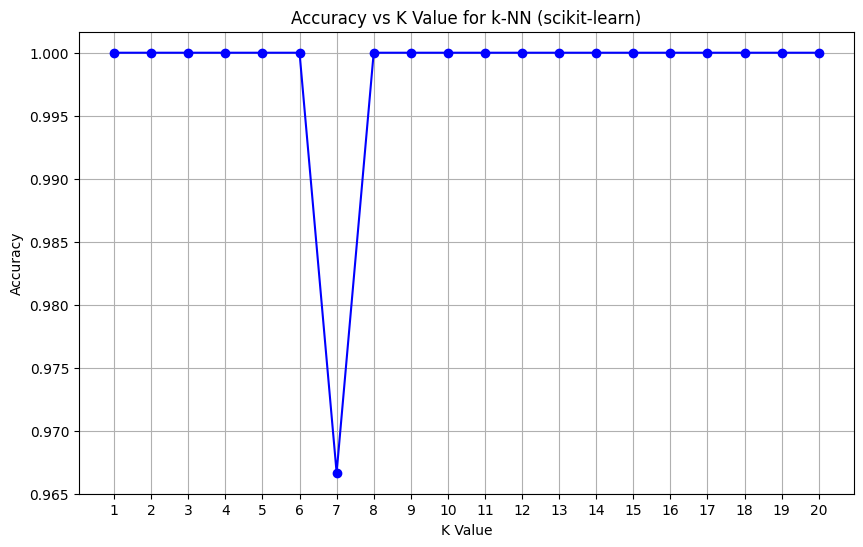

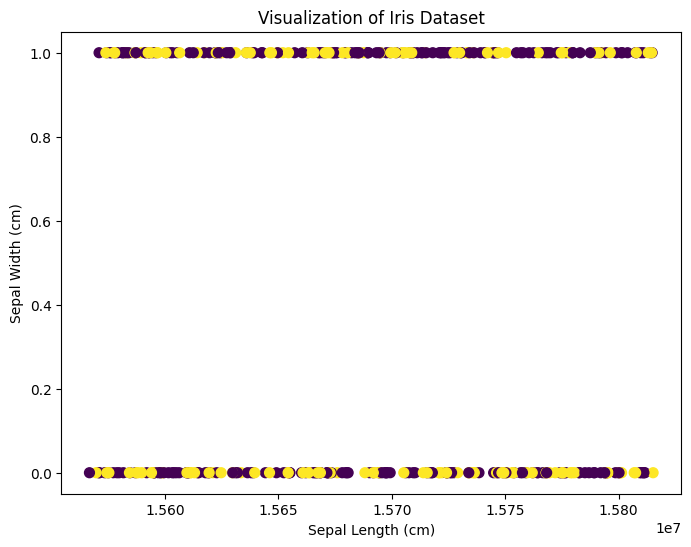

In [41]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#function to calculate Euclidean distance
def calculate_euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Define the k-NN algorithm from scratch
class KNearestNeighbors:
    def __init__(self, k):
        self.k = k

    def fit(self, training_data, labels):
        self.training_data = training_data
        self.labels = labels

    def predict(self, test_data):
        predicted_labels = [self._predict(instance) for instance in test_data]
        return np.array(predicted_labels)

    def _predict(self, instance):
        distances = [calculate_euclidean_distance(instance, training_instance) for training_instance in self.training_data]
        k_nearest_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.labels[i] for i in k_nearest_indices]
        most_common_label = np.bincount(k_nearest_labels).argmax()
        return most_common_label

# Using k-NN from scratch
knn_model = KNearestNeighbors(k=3)
knn_model.fit(x_train, y_train)
predicted_labels = knn_model.predict(x_test)

accuracy = np.mean(predicted_labels == y_test)
print(f"Accuracy of the k-NN model from scratch: {accuracy}")

# Load the Iris dataset
iris_data = load_iris()
x_data = iris_data.data
y_data = iris_data.target

# Split the dataset into training and testing sets
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Initialize the k-NN classifier
k_values_list = list(range(1, 21))  # Define a range of k values
accuracy_values = []

for k_value in k_values_list:
    # Train the k-NN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k_value)
    knn_classifier.fit(x_train_data, y_train_data)
    
    # Calculate accuracy on the test set
    accuracy_value = knn_classifier.score(x_test_data, y_test_data)
    accuracy_values.append(accuracy_value)

    print(f"For k = {k_value}, Accuracy: {accuracy_value}")

# Plot accuracy vs k value
plt.figure(figsize=(10, 6))
plt.plot(k_values_list, accuracy_values, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs K Value for k-NN (scikit-learn)')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values_list)
plt.grid(True)
plt.show()

# Visualizing the Iris dataset
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', s=50)
plt.title('Visualization of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()
